In [ ]:
from IPython.display import Image, display

from torchvision import transforms
import numpy as np
import pandas as pd
import torch
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torchvision import transforms
from torchvision.models.resnet import resnet152, ResNet152_Weights
import torchvision.transforms.functional as TF

from src.dataset import StomachCancerDataset
from src.dataloader import build_loader

In [254]:
CLASSES = ["ADI", "DEB", "LYM", "MUC", "MUS", "NOR", "STR", "TUM"]
LABEL_MAP = {label: i for i, label in enumerate(CLASSES)}

## FC_1024-256_RELU

Arquitetura:
- Linear(model.fc.in_features, 1024)
- BatchNorm1d(1024)
- ReLU
- Dropout(0.4)
- Linear(1024, 256)
- BatchNorm1d(256)
- ReLU
- Dropout(0.4)
- Linear(256, 8)

Tempo de treinamento: 05:32:07 <br>
Acurácia: 68.94% <br>
F1-score: 79.01% <br>
Total de épocas: 88

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\william\AppData\Local\Temp\ipykernel_25316\3136950352.py:1: SyntaxWarning: invalid escape sequence '\m'
  matrix_path = "plots\matrix_fc_1024-256_relu.png"


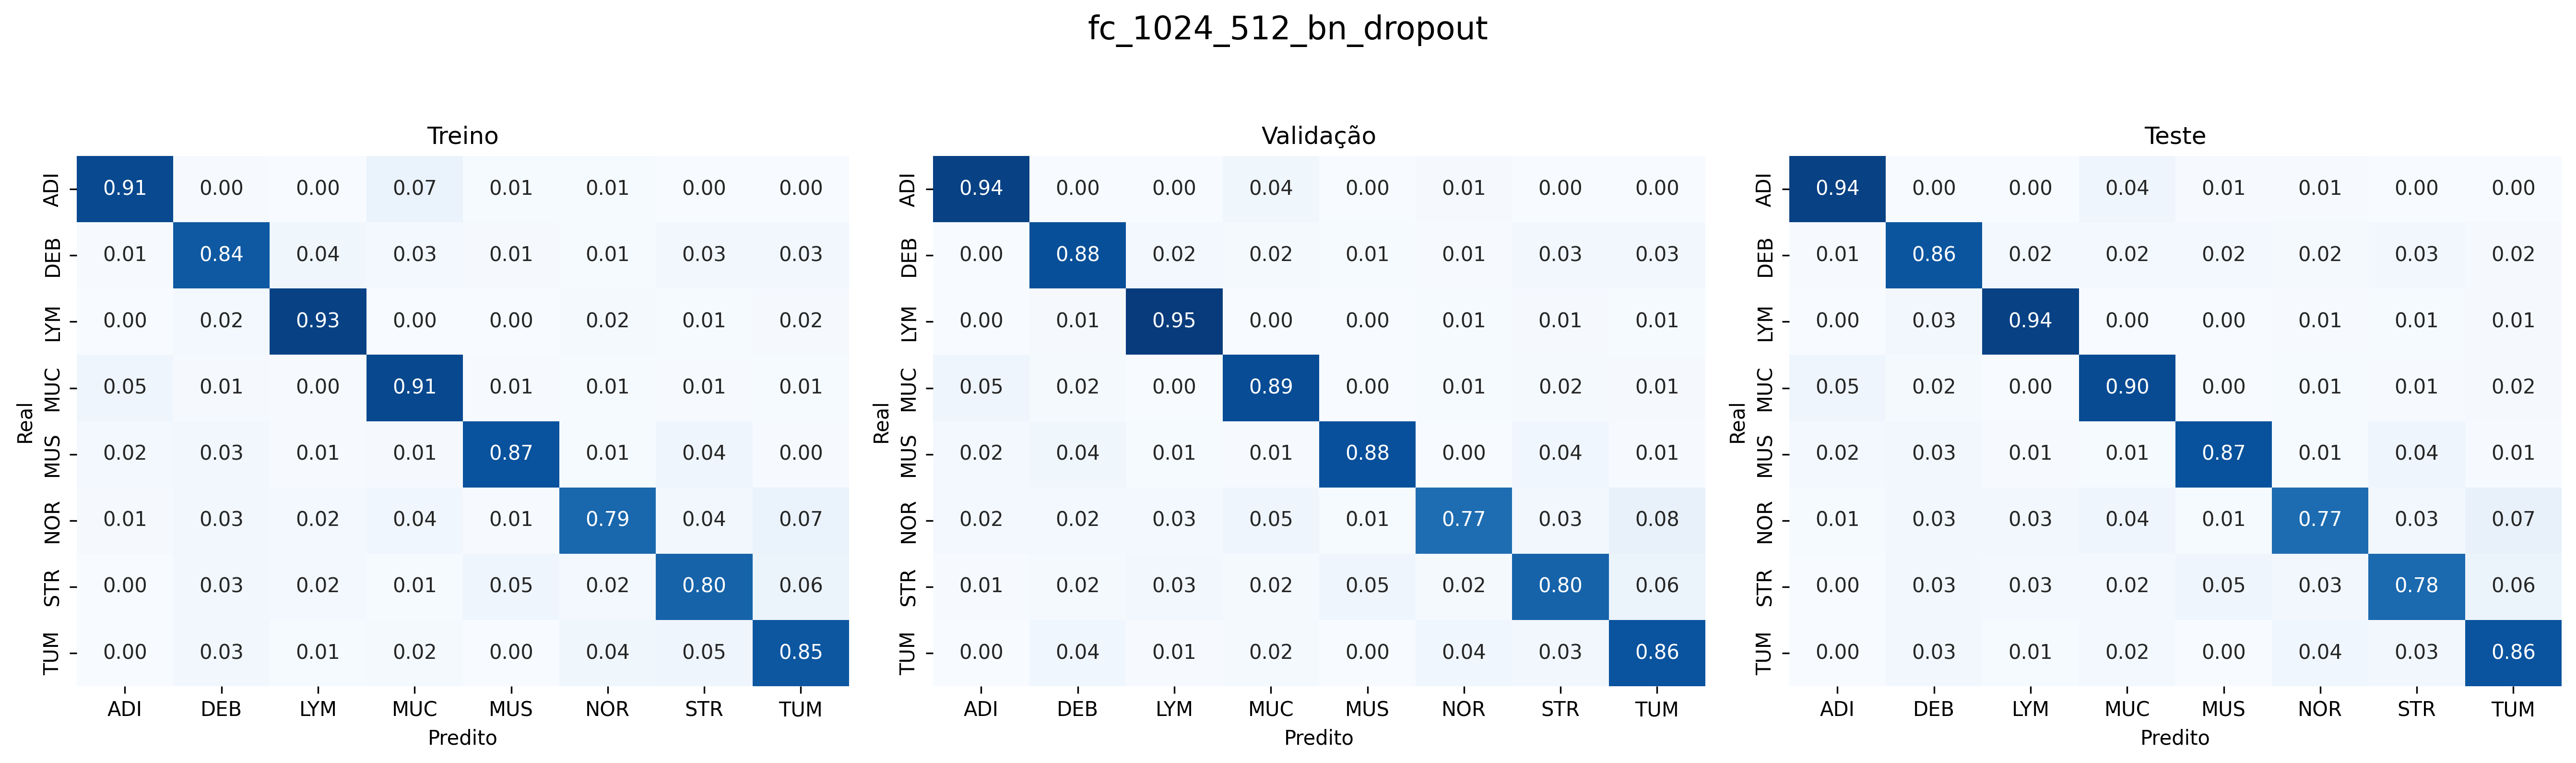

In [255]:
matrix_path = "plots\matrix_fc_1024-256_relu.png"
display(Image(matrix_path))

O desempenho geral por classe se fez consistente entre os conjuntos. As maiores confusões ocorrem entre a classe TUM e STR/NOR, enquanto as classes LYM, ADI e TUM se mostram as mais bem classificadas, tomando-se um limiar de aproximadamente 0.9 em todos os conjuntos. <br>

O F1-score de 79.01% indica que o modelo consegue prever corretamente a maioria das classes de forma equilibrada.

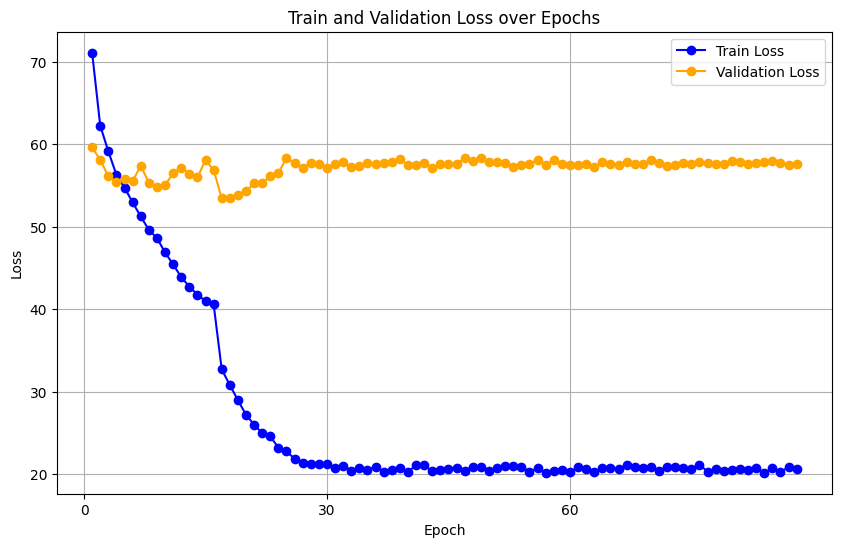

In [256]:
def build_FC_1024_256_RELU(in_features: int) -> nn.Sequential:
    return nn.Sequential(
        nn.Linear(in_features, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(1024, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 8),
    )
    
model = resnet152(weights=ResNet152_Weights.IMAGENET1K_V1)
model.fc = build_FC_1024_256_RELU(2048)
df = pd.read_csv("results/ResNet/fc_1024-256_relu/train_stats.csv")


plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
plt.plot(df['Epoch'], df['Val Loss'], marker='o', label='Validation Loss', color='orange')

plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, max(df['Epoch']), 30))
plt.legend()
plt.grid(True)

plt.show()

Percebe-se que as perdas dos conjuntos de treino e validação convergem por volta das quatro primeiras épocas. Após isso, nota-se que a perda do treino decresce continuamente até se estabilizar, enquanto a perda da validação estagna. O comportamento observado é um sinal de overfitting, pois o modelo memoriza os dados de treino mas não generaliza bem para a validação.

## FC_1024-64_SIGMOID
- Linear(model.fc.in_features, 1024)
- Sigmoid
- Linear(1024, 512)
- Sigmoid
- Linear(512, 64)
- Sigmoid
- Linear(64,8)

Tempo de treinamento: 05:24:21 <br>
Acurácia: 67.46% <br>
F1-score: 76.27% <br>
Total de épocas: 92 

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\william\AppData\Local\Temp\ipykernel_25316\2250627750.py:1: SyntaxWarning: invalid escape sequence '\m'
  path = "plots\matrix_fc_1024-64_sigmoid.png"


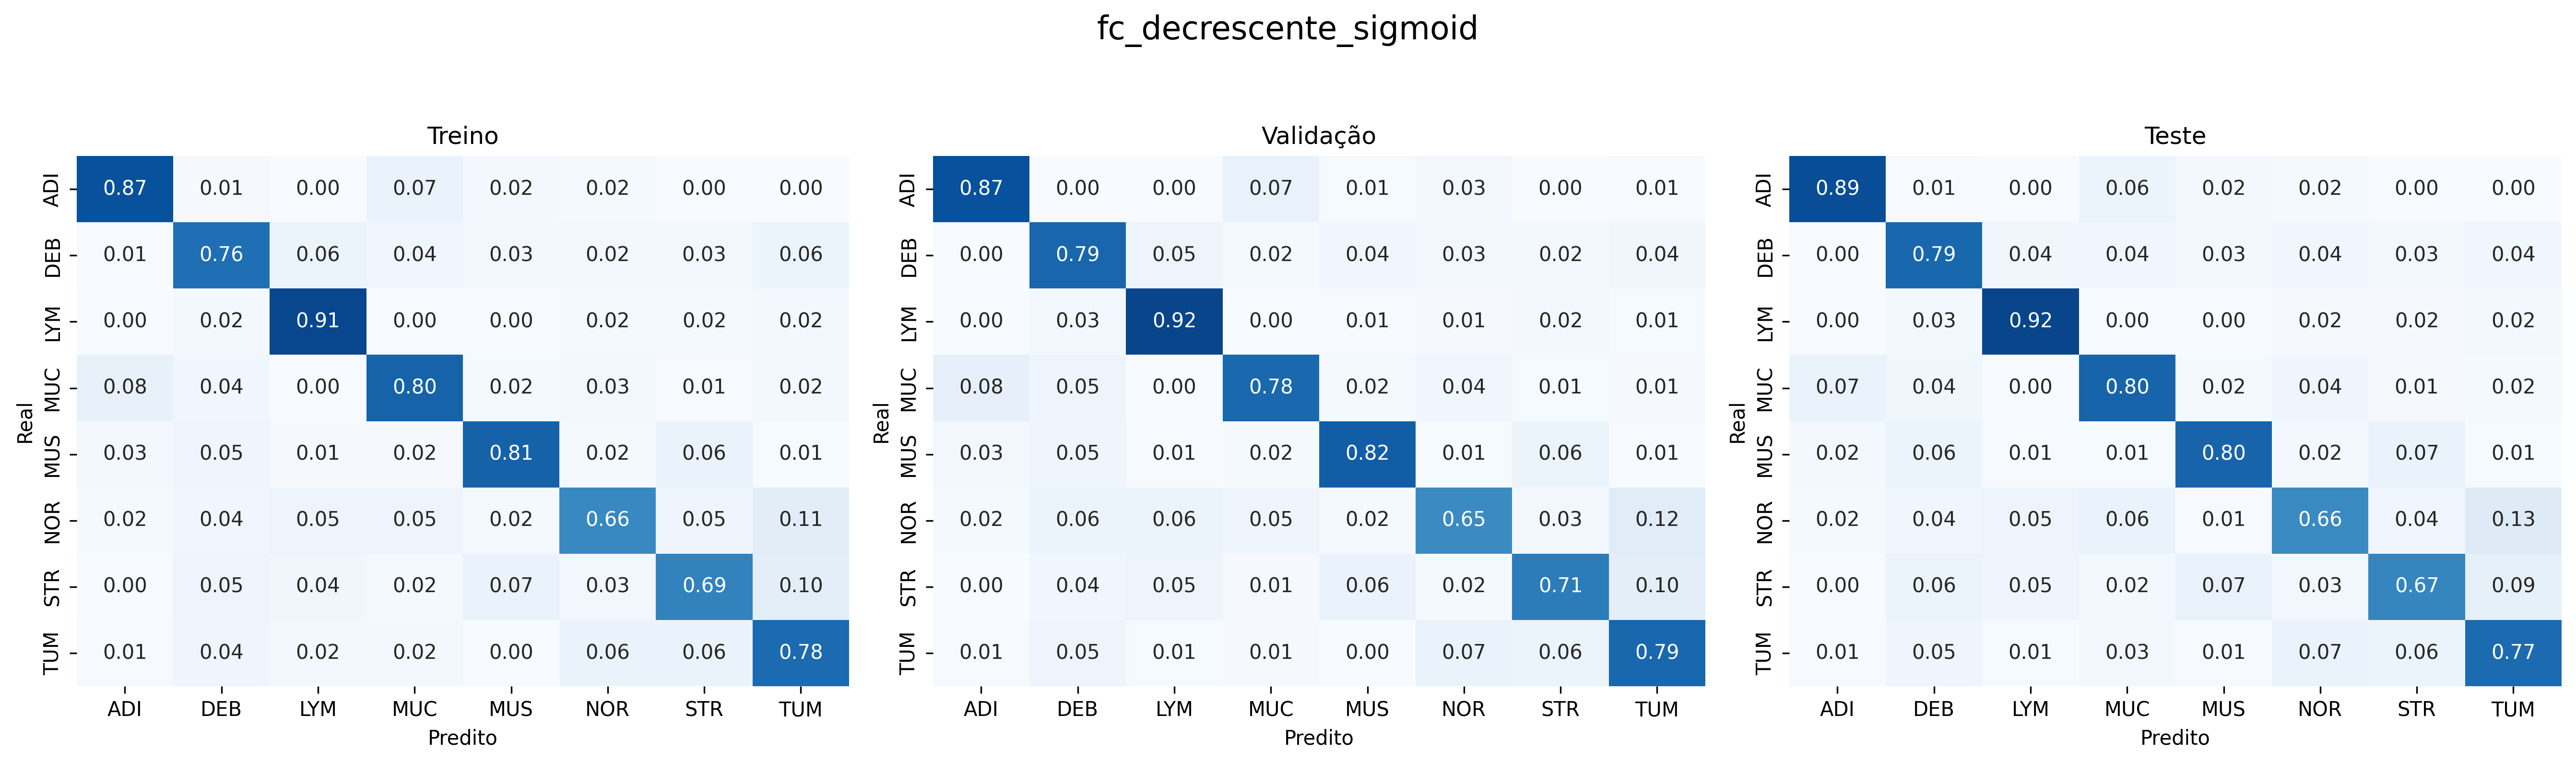

In [267]:
path = "plots\matrix_fc_1024-64_sigmoid.png"
display(Image(path))

Observa-se que no conjunto de validação a acurácia por classe foi visivelmente pior que no conjunto de treino de modo geral, com as classes NOR, STR e TUM tendo a maior taxa de confusões. O conjunto de teste apresenta um desempenho semelhante à validação, e percebe-se que a classe NOR continua tendo o pior desempenho em todos os conjuntos. <br>

O F1-score de 76.27% relativamente próximo da acurácia de 67,46% é, sobretudo, um sinal de consistência na distribuição de erros entre as classes.

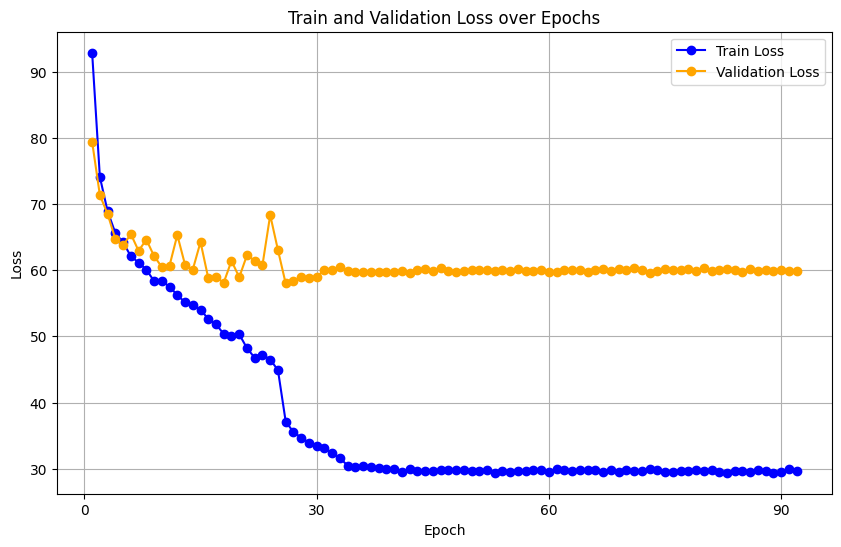

In [268]:
def build_FC_1024_64_SIGMOID(in_features: int) -> nn.Sequential:
    return nn.Sequential(
        nn.Linear(in_features, 1024),
        nn.Sigmoid(),
        nn.Linear(1024, 512),
        nn.Sigmoid(),
        nn.Linear(512, 64),
        nn.Sigmoid(),
        nn.Linear(64, 8),
    )
    
df = pd.read_csv("results/ResNet/fc_1024-64-sigmoid/train_stats.csv")
model = build_FC_1024_256_RELU(in_features=2048)

plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
plt.plot(df['Epoch'], df['Val Loss'], marker='o', label='Validation Loss', color='orange')

plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, max(df['Epoch']), 30))
plt.legend()
plt.grid(True)

plt.show()

Observa-se que as perdas do treino e da validação caem constantemente até se estabilizar por volta da época 25, e depois passam a divergir e se estabilizar. Com base no comportamento do gráfico, o modelo aprendeu bem o conjunto de treino mas não generalizou bem para a validação, indicativo de overfitting.

## FC_2048-64_RELU

- Linear(model.fc.in_features, 2048)
- ReLU
- Linear(2048, 512)
- ReLU
- Linear(512, 64)
- ReLU
- Linear(64, 8)

Tempo de treinamento: 05:43:00 <br>
Acurácia: 66.64%<br>
F1-score: 68.33%

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\william\AppData\Local\Temp\ipykernel_25316\1700881042.py:1: SyntaxWarning: invalid escape sequence '\m'
  path = "plots\matrix_fc_2048-64_relu.png"


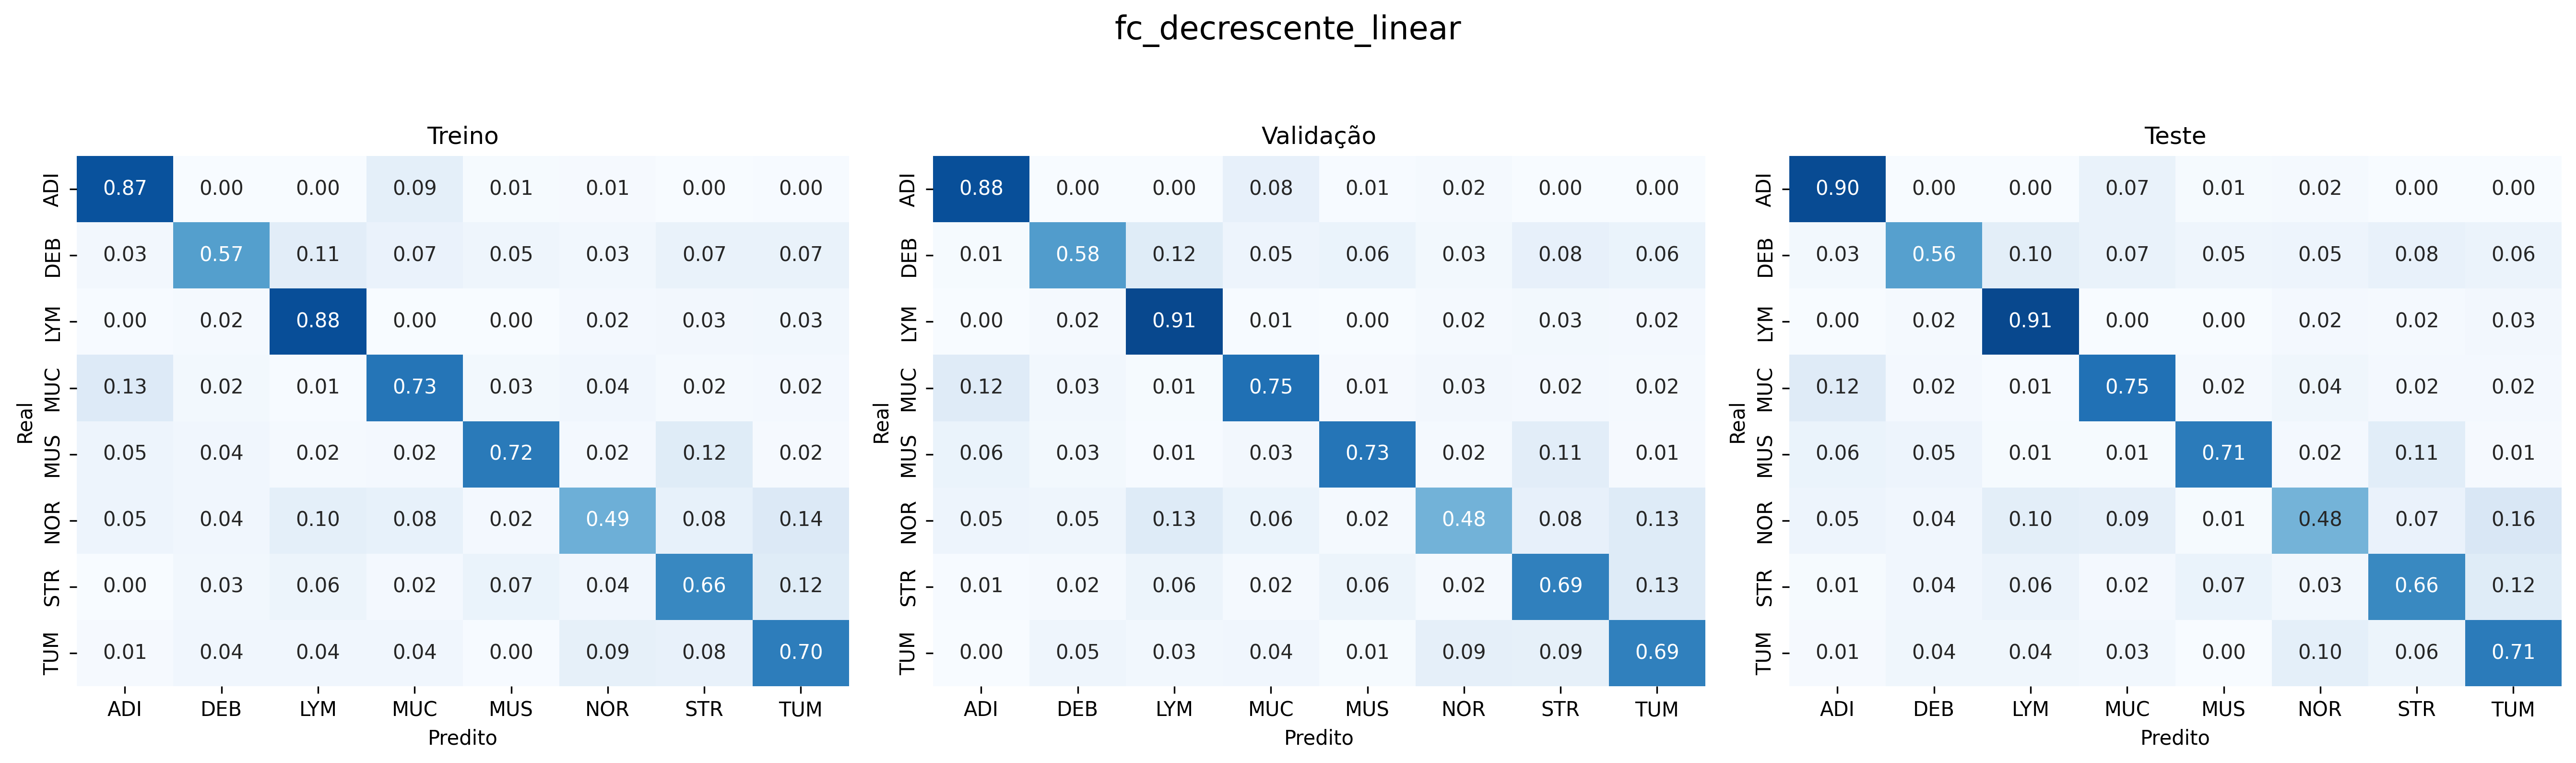

In [259]:
path = "plots\matrix_fc_2048-64_relu.png"
display(Image(path))

As matrizes de confusão mostram que as maiores acurácias estão nas classes ADI e LYM, entre todos os conjuntos. Percebe-se que a classe NOR é consistentemente a mais difícil de prever corretamente em todos os conjuntos.

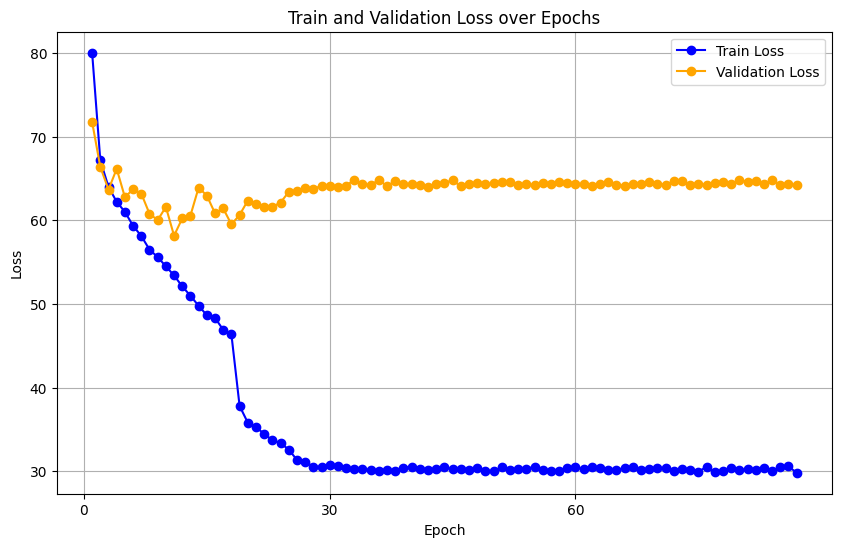

In [260]:
def build_FC_2048_64_RELU(in_features: int) -> nn.Sequential:
    return nn.Sequential(
        nn.Linear(in_features, 2048),
        nn.ReLU(),
        nn.Linear(2048, 512),
        nn.ReLU(),
        nn.Linear(512, 64),
        nn.ReLU(),
        nn.Linear(64, 8),
    )
    
df = pd.read_csv("results/ResNet/fc_2048-64_relu/train_stats.csv")
model = build_FC_1024_256_RELU(in_features=2048)

plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
plt.plot(df['Epoch'], df['Val Loss'], marker='o', label='Validation Loss', color='orange')

plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, max(df['Epoch']), 30))
plt.legend()
plt.grid(True)

plt.show()

A perda de treino decresce continuamente e se estabiliza por volta da época 25, enquanto a perda de validação decai até as épocas 10-15, e passam a oscilar levemente. A partir da época 20 as curvas passam a divergir, indicando overfitting.

## FC_1024-256_SILU
- Linear(model.fc.in_features, 1024)
- nn.SiLU(),
- nn.Dropout(0.5),
- nn.Linear(1024, 256),
- nn.SiLU(),
- nn.Dropout(0.5),
- nn.Linear(256, 8)

Tempo de treinamento: 05:57:56 <br>
Acurácia: 66.43%<br>
F1-score: 69.14%

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\william\AppData\Local\Temp\ipykernel_25316\718037683.py:1: SyntaxWarning: invalid escape sequence '\m'
  path = "plots\matrix_fc_1024-256_silu.png"


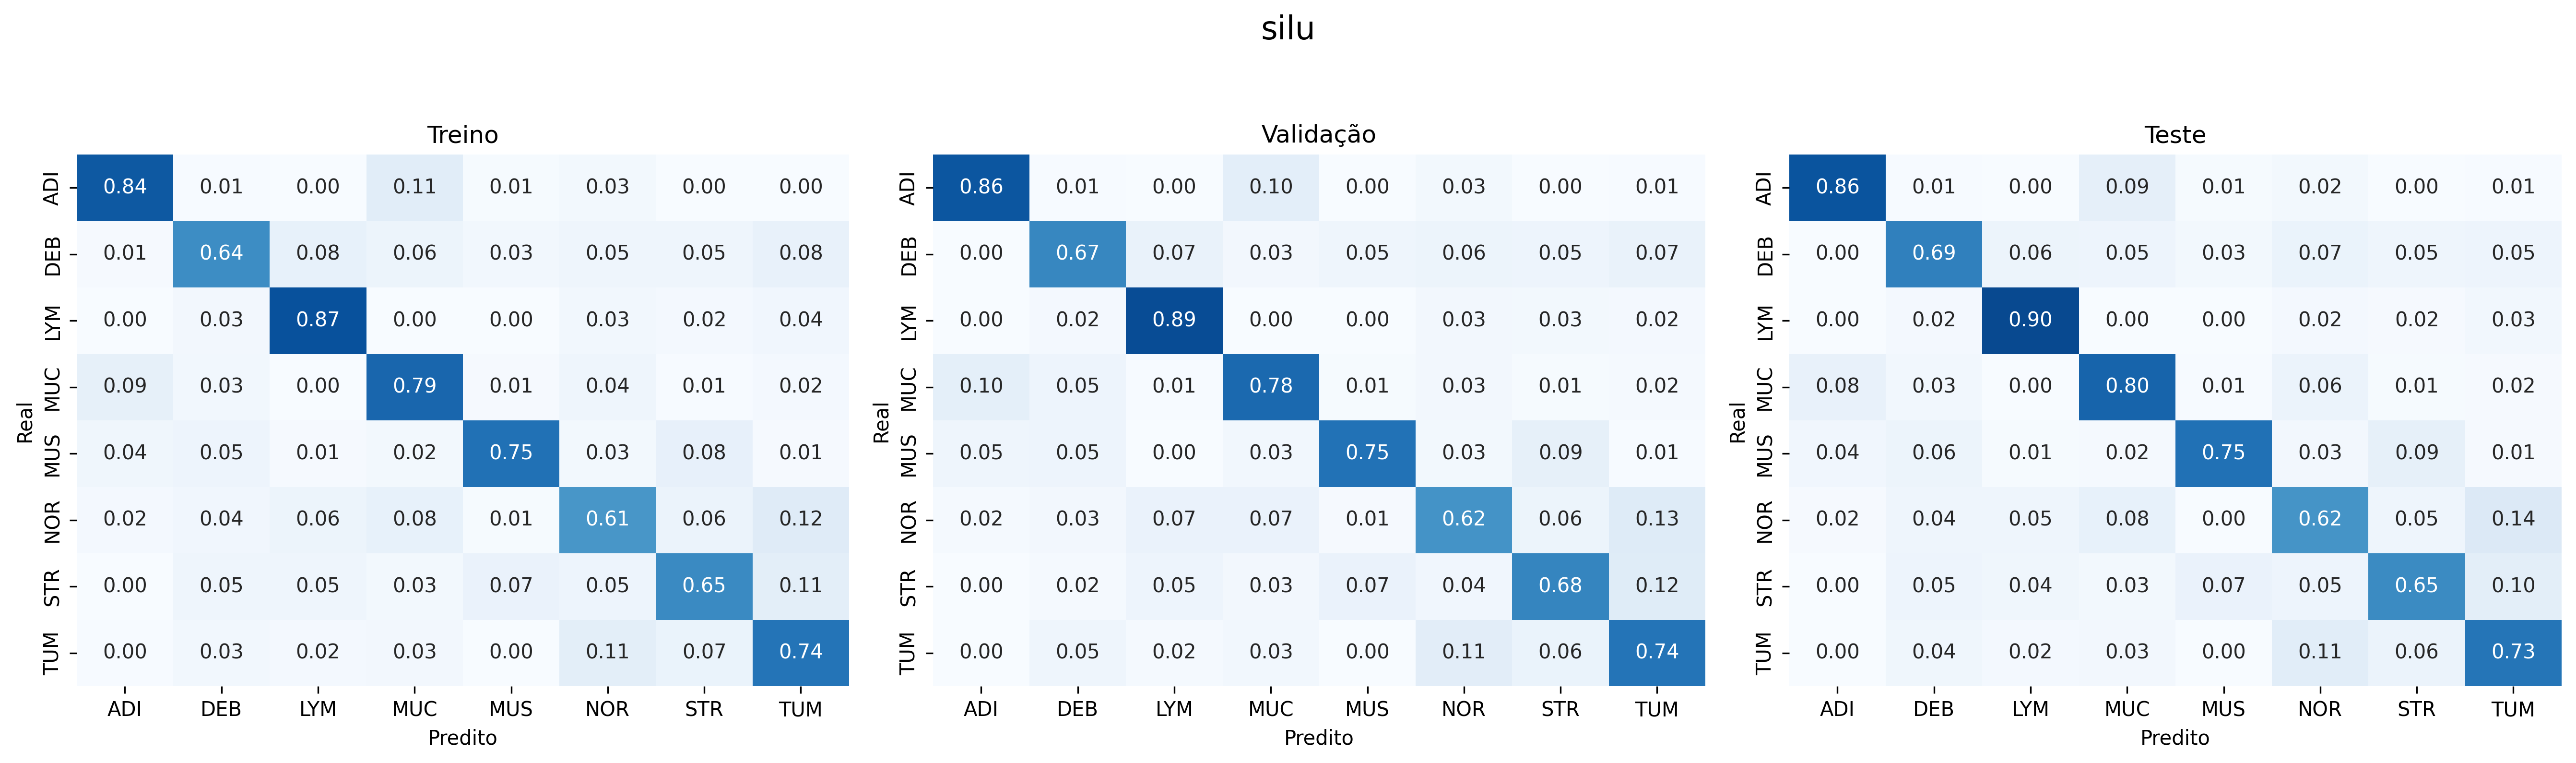

In [261]:
path = "plots\matrix_fc_1024-256_silu.png"
display(Image(path))

Percebe-se que há uma consistência maior entre os conjuntos de validação e teste, sugerindo que o modelo generalizou de forma estável. Além disso, a classe LYM permanece apresentando a maior acurácia em todos os conjuntos.

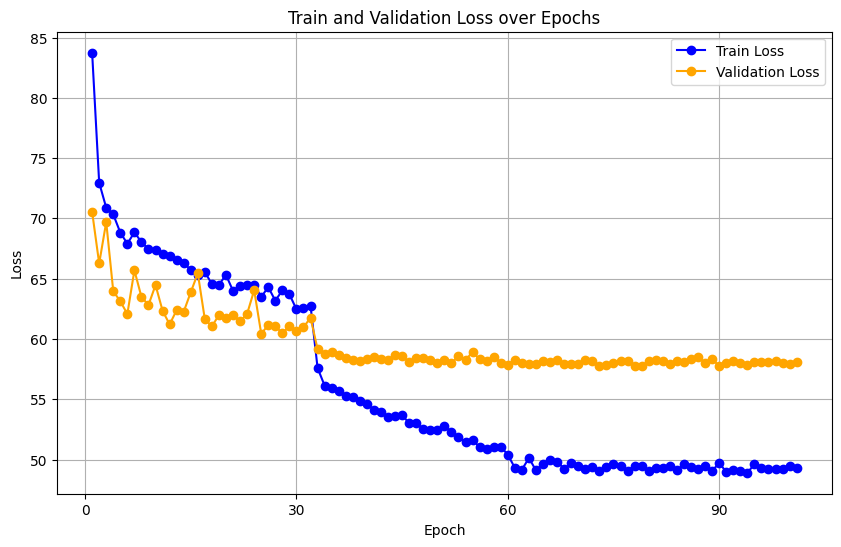

In [262]:
def build_FC_1024_256_SILU(in_features: int) -> nn.Sequential:
    return nn.Sequential(
        nn.Linear(in_features, 1024),
        nn.SiLU(),
        nn.Dropout(0.5),
        nn.Linear(1024, 256),
        nn.SiLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 8),
    )
    
df = pd.read_csv("results/ResNet/fc_1024-256_silu/train_stats.csv")
model = build_FC_1024_256_RELU(in_features=2048)

plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
plt.plot(df['Epoch'], df['Val Loss'], marker='o', label='Validation Loss', color='orange')

plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, max(df['Epoch']), 30))
plt.legend()
plt.grid(True)

plt.show()

## FC_2048-512_GELU
- Linear(model.fc.in_features, 2048)
- GELU
- Linear(2048, 512)
- GELU
- Linear(512, 8)

Tempo de treinamento: 11:32:19 <br>
Acurácia: 65.67%<br>
F1-score: 68.87%

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\william\AppData\Local\Temp\ipykernel_25316\43489419.py:1: SyntaxWarning: invalid escape sequence '\m'
  path = "plots\matrix_fc_2048-512_gelu.png"


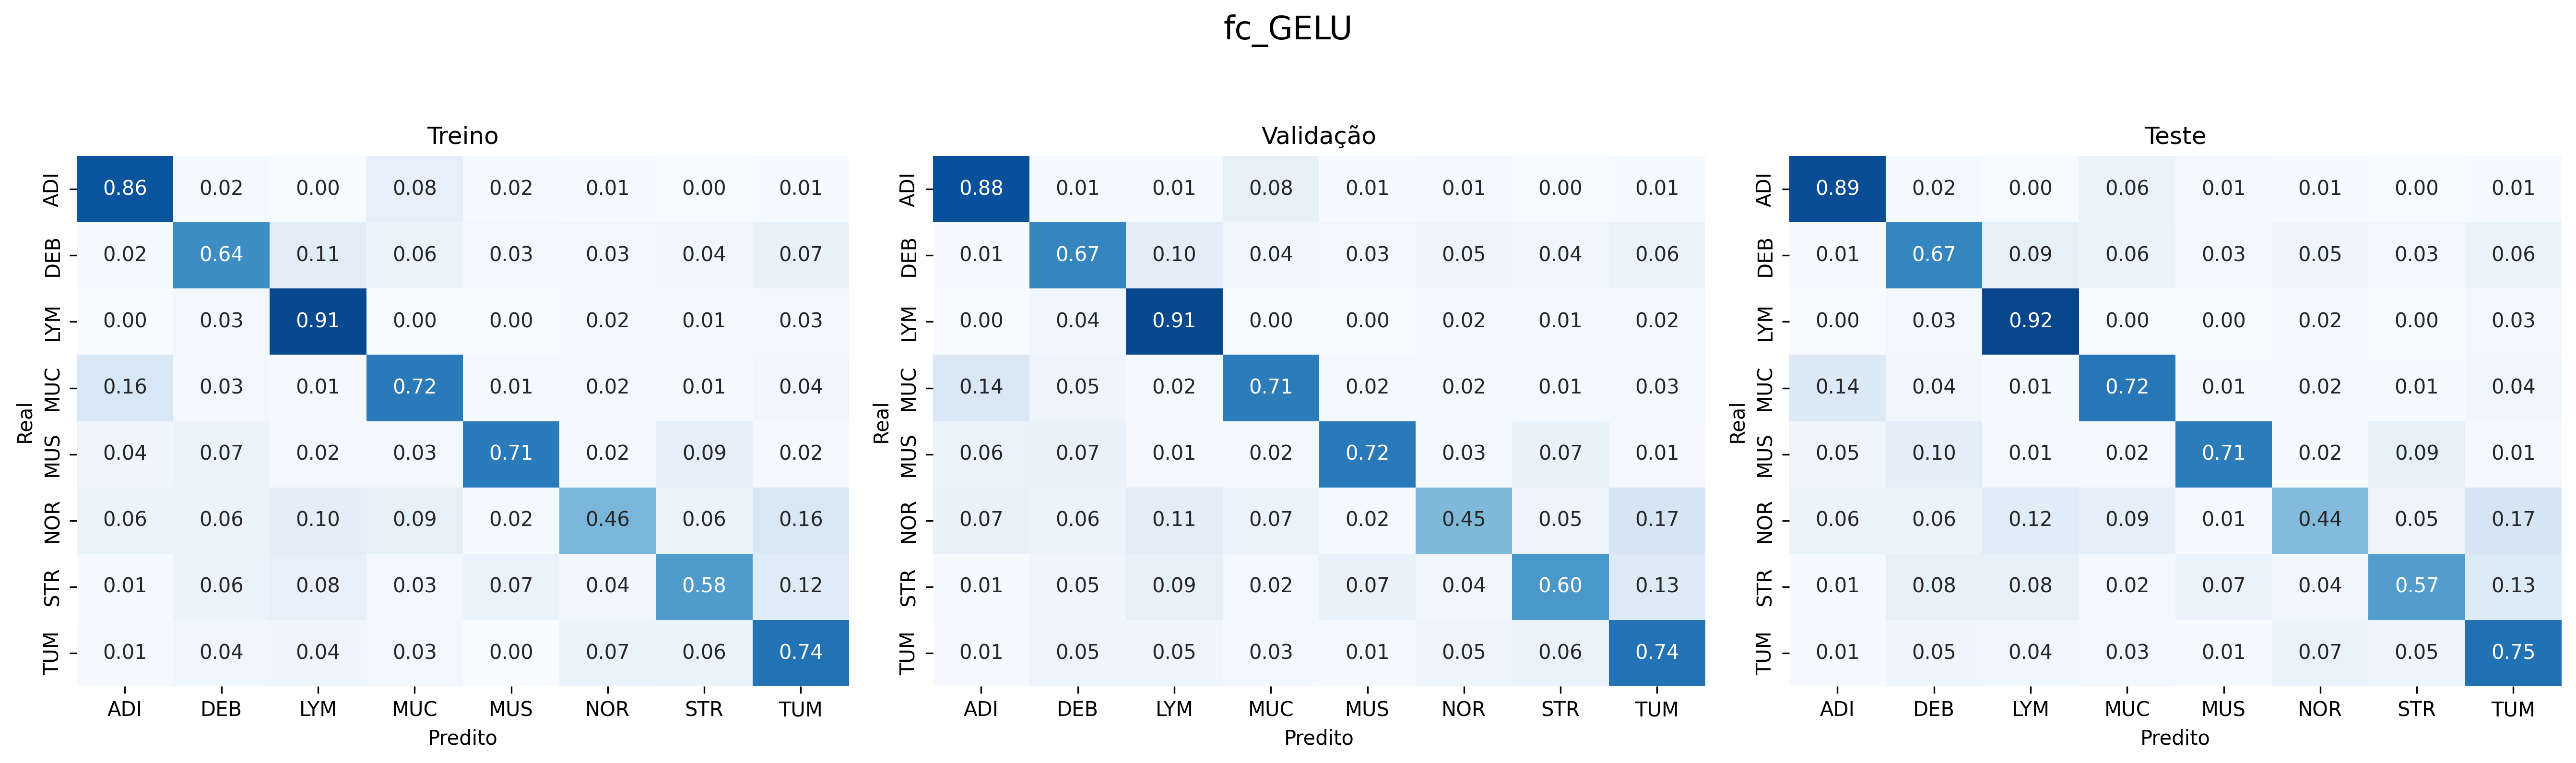

In [263]:
path = "plots\matrix_fc_2048-512_gelu.png"
display(Image(path))

Este modelo apresentou menor acurácia nas classes NOR e STR em todos os conjuntos. Analogamente, a classe LYM teve consistentemente o melhor desempenho.

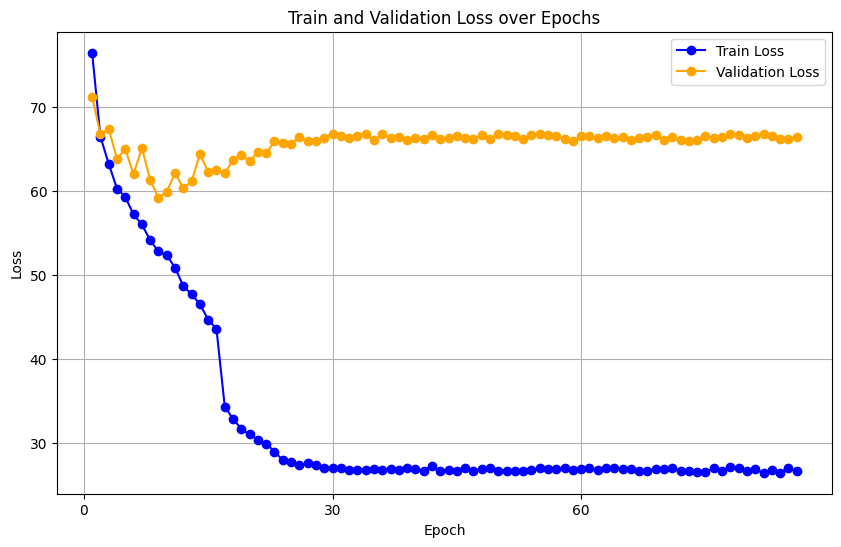

In [264]:
def build_FC_2048_512_GELU(in_features: int) -> nn.Sequential:
    return nn.Sequential(
        nn.Linear(in_features, 2048),
        nn.GELU(),
        nn.Linear(2048, 512),
        nn.GELU(),
        nn.Linear(512, 8),
    )
    
df = pd.read_csv("results/ResNet/fc_2048-512_gelu/train_stats.csv")
model = build_FC_1024_256_RELU(in_features=2048)

plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
plt.plot(df['Epoch'], df['Val Loss'], marker='o', label='Validation Loss', color='orange')

plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, max(df['Epoch']), 30))
plt.legend()
plt.grid(True)

plt.show()

Observa-se que a perda de treino cai rapidamente e se estabiliza por volta da época 30. A perda de validação diminui inicialmente, mas começa a subir após aproximadamente 10 épocas, estabilizando-se após o treino. O comportamento observado também indica overfitting.

## FC_512-128_TANH

- FC_512-128_TANH:
- Linear(model.fc.in_features, 512)
- BatchNorm1d(512)
- Tanh
- Dropout(0.3)
- Linear(512, 128)
- BatchNorm1d(128)
- Tanh
- Dropout(0.3)
- Linear(128, 8)

Tempo de treinamento: 06:39:45 <br>
Acurácia: 59.04%<br>
F1-score: 63.58%

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\william\AppData\Local\Temp\ipykernel_25316\3979760874.py:1: SyntaxWarning: invalid escape sequence '\m'
  path = "plots\matrix_fc_512-128_tanh.png"


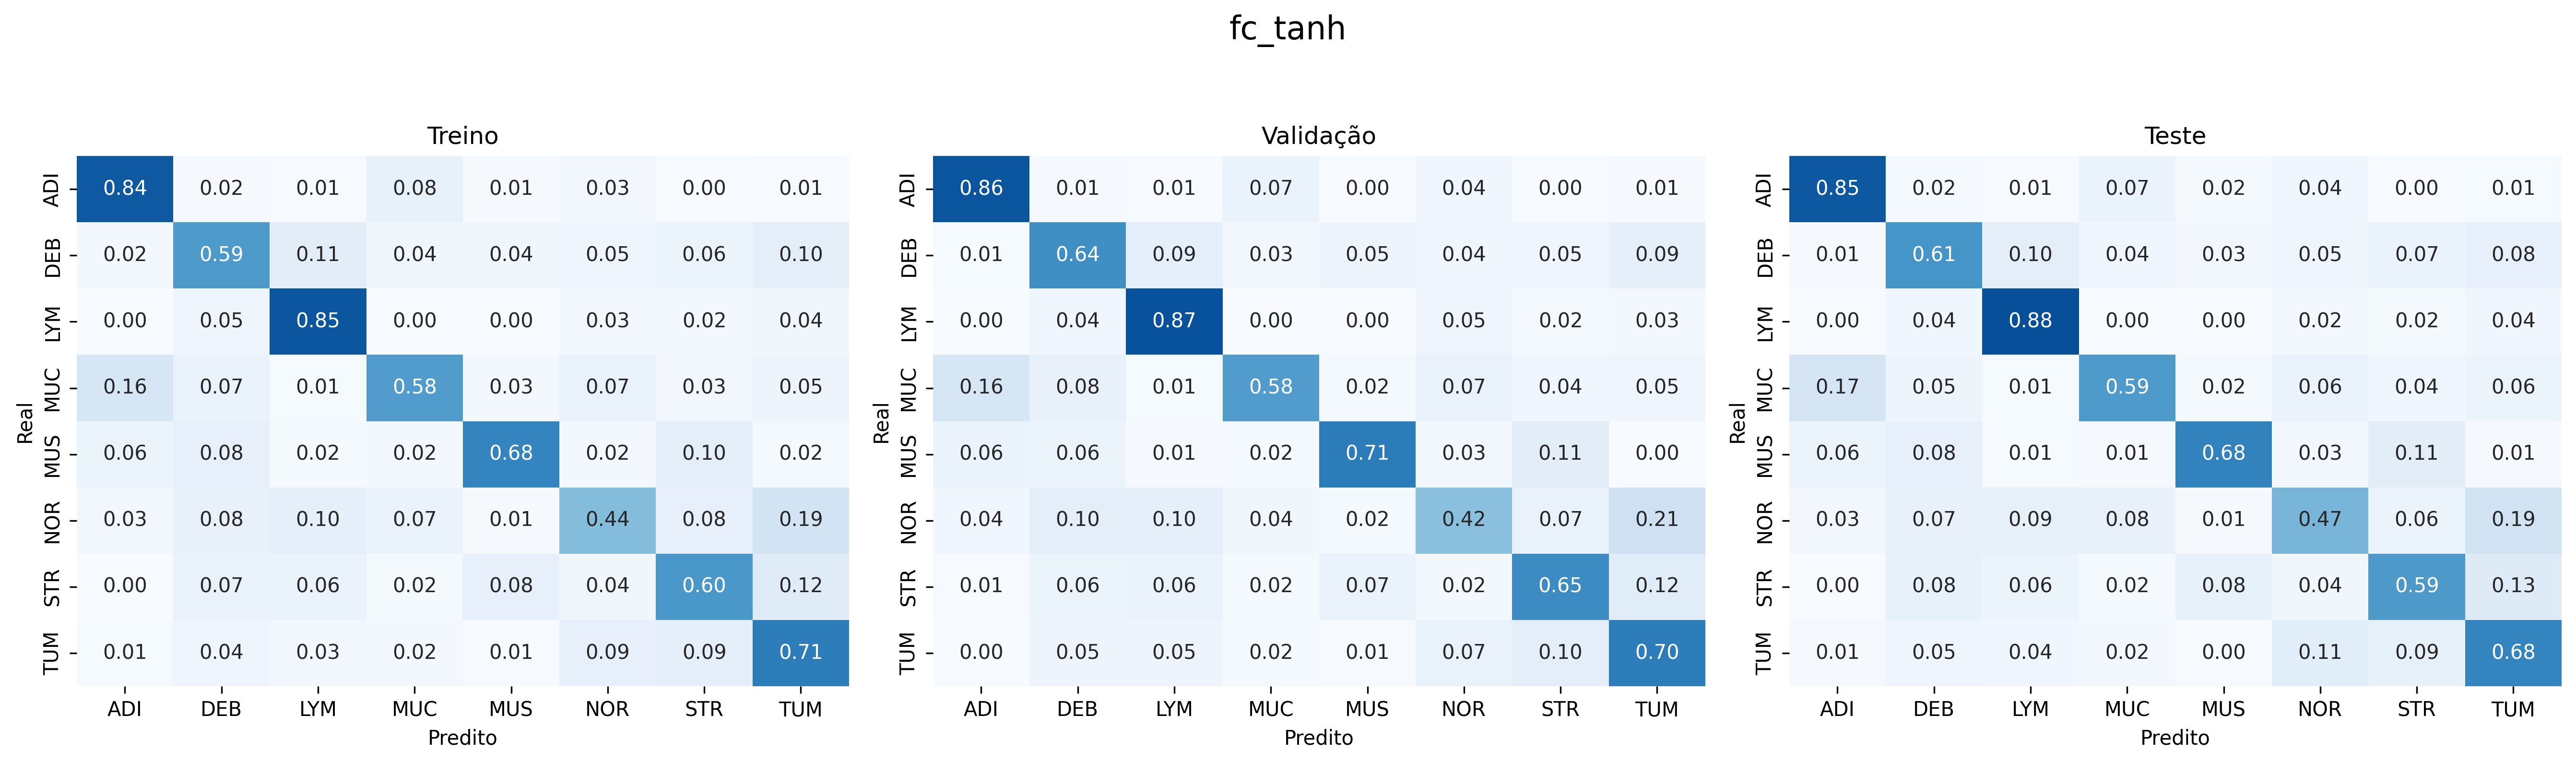

In [265]:
path = "plots\matrix_fc_512-128_tanh.png"
display(Image(path))

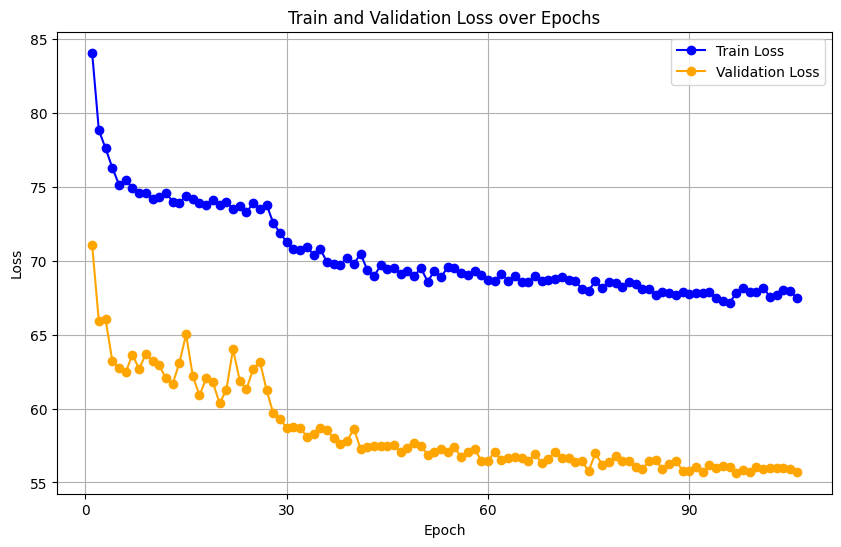

In [266]:
def build_FC_512_128_TANH(in_features: int) -> nn.Sequential:
    return nn.Sequential(
        nn.Linear(in_features, 512),
        nn.BatchNorm1d(512),
        nn.Tanh(),
        nn.Dropout(0.3),
        nn.Linear(512, 128),
        nn.BatchNorm1d(128),
        nn.Tanh(),
        nn.Dropout(0.3),
        nn.Linear(128, 8),
    )
    
df = pd.read_csv("results/ResNet/fc_512-128_tanh/train_stats.csv")
model = build_FC_1024_256_RELU(in_features=2048)

plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], marker='o', label='Train Loss', color='blue')
plt.plot(df['Epoch'], df['Val Loss'], marker='o', label='Validation Loss', color='orange')

plt.title('Train and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, max(df['Epoch']), 30))
plt.legend()
plt.grid(True)

plt.show()

# Conclusão

Observou-se que a maioria dos modelos apresentou overfitting antes das primeiras 30 épocas. Considerando que o conjunto de dados possui classes balanceadas e que, mesmo com a aplicação de técnicas como dropout, batch normalization e early stopping, esse comportamento persistiu, uma possível explicação é a redundância visual entre as classes. Por se tratar de um conjunto de dados com distinções visuais relativamente simples, o modelo pode estar se ajusustando aos padrões do conjunto de treinamento com muita facilidade, o que contribui para o overfitting.

A análise dos resultados também revela padrões recorrentes entre todos os modelos:

- A classe LYM é consistentemente a mais fácil de ser classificada, possivelmente devido à sua morfologia mais distintiva em relação às demais classes.

- A classe NOR se mostrou a mais desafiadora, possivelmente por apresentar características que se sobrepõem às variações das outras classes. Essa ambiguidade pode explicar a dificuldade dos modelos em diferenciá-la com precisão.
